In [3]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
import ast
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.rcParams['figure.figsize'] = (14.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 450)

In [4]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures"

### Import

In [2]:
methods= ["direct_and_pr", "iterative_pr_head_ref_cherry_picked"]

In [6]:
direct_and_pr = pd.read_csv(f"{csv_folder}/final_datasets/{methods[0]}_with_sw_metrics.csv", index_col=0)

In [7]:
iterative_pr_head_ref_cherry_picked = pd.read_csv(f"{csv_folder}/final_datasets/{methods[1]}_with_sw_metrics.csv", index_col=0)

In [10]:
methods_df = {"direct_and_pr":direct_and_pr,
             "iterative_pr_head_ref_cherry_picked": iterative_pr_head_ref_cherry_picked}

**Extracting the dependent variables** 

In [12]:
dep_var_cols = ["post_release_bugs", "fix_time", "dde", "critical_post_release_bugs", "minor_post_release_bugs"]

In [13]:
methods_dep_var = {}
for method in methods:
    methods_dep_var[method] = methods_df[method]\
    [dep_var_cols]

**Extracting the independent variables**

In [17]:
extra_info_cols = ['version_name','from_author_date', 'to_author_date', 'ahead_by', 'behind_by',
       'from_sha', 'to_sha', 'ahead_behind_sum', 'diff_author_dates',
       'diff_author_days', 'from_commit_date','to_commit_date', 'diff_commit_dates', 'diff_commit_days', 'to_tag',
       'from_tag']

In [18]:
methods_indep_var = {}
for method in methods:
    methods_indep_var[method] = methods_df[method].drop(columns=extra_info_cols + dep_var_cols)

In [19]:
methods_indep_var[methods[0]].columns

Index(['ratio_passed_builds', 'ratio_canceled_builds', 'ratio_failed_builds',
       'ratio_errored_builds', 'ratio_pr_builds', 'mean_all_build_duration',
       'median_all_build_duration', 'max_all_build_duration',
       'min_all_build_duration', 'mean_failed_build_duration',
       ...
       'mean_n_warnings', 'median_n_warnings', 'max_n_warnings',
       'min_n_warnings', 'mean_n_error_classes', 'median_n_error_classes',
       'max_n_error_classes', 'min_n_error_classes', 'pre_release_bugs',
       'pre_release_after_tagging_bugs'],
      dtype='object', length=267)

**Correlation**

In [181]:
corr_x = tags_comparison_with_metrics_x.corr()

In [182]:
corr_x.loc["canceled_gp3_bs3_n_bursts_mean"][corr_x.loc["canceled_gp3_bs3_n_bursts_mean"] > 0.8]

canceled_gp1_bs3_n_bursts_mean    0.811390
canceled_gp2_bs2_n_bursts_mean    0.812558
canceled_gp2_bs3_n_bursts_mean    0.903717
canceled_gp3_bs3_n_bursts_mean    1.000000
Name: canceled_gp3_bs3_n_bursts_mean, dtype: float64

**Check for normal distribution**

In [21]:
alpha = 0.05

In [27]:
for method in methods:
    df = methods_indep_var[method]
    k2, p_val = stats.normaltest(df)
    cols = df.columns
    print(cols[p_val > alpha])

Index(['not_passed_gp1_bs2_burst_size_mean',
       'not_passed_gp1_bs3_burst_size_median',
       'not_passed_gp2_bs2_burst_size_mean',
       'not_passed_gp2_bs3_burst_size_median',
       'not_passed_gp3_bs2_burst_size_mean',
       'not_passed_gp3_bs3_burst_size_median',
       'canceled_gp1_bs2_burst_size_mean',
       'canceled_gp1_bs3_burst_size_median',
       'canceled_gp2_bs2_burst_size_mean',
       'canceled_gp2_bs3_burst_size_median',
       'canceled_gp3_bs2_burst_size_mean',
       'canceled_gp3_bs3_burst_size_median', 'failed_gp1_bs2_burst_size_mean',
       'failed_gp1_bs3_burst_size_median', 'failed_gp2_bs2_burst_size_mean',
       'failed_gp2_bs3_burst_size_median', 'failed_gp3_bs2_burst_size_mean',
       'failed_gp3_bs3_burst_size_median'],
      dtype='object')
Index(['not_passed_gp1_bs2_burst_size_mean',
       'not_passed_gp1_bs3_burst_size_median',
       'not_passed_gp2_bs2_burst_size_mean',
       'not_passed_gp2_bs3_burst_size_median',
       'not_passed_gp3

### Spearman correlation with Number of post release bugs
https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php#:~:text=The%20Spearman%20correlation%20coefficient%2C%20rs%2C%20can%20take%20values%20from,the%20association%20between%20the%20ranks.

In [187]:
data = []
for col in tags_comparison_with_metrics_x.columns.values:
    corr, p_val = stats.spearmanr(tags_comparison_with_metrics_x[f"{col}"],tags_comparison_with_metrics_y.post_release_bugs)
    data.append((col, corr, p_val))
spearman_corr_post_release_bugs_df = pd.DataFrame(data, columns=["metric", "corr", "p_val"])

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


top_spearm = spearman_corr_post_release_bugs_df[spearman_corr_post_release_bugs_df.p_val< 0.05].sort_values(by="corr", ascending=False)
print(top_spearm[~top_spearm.metric.str.contains("pre_release")].head(10).to_latex(index=False))

print( top_spearm[(~top_spearm.metric.str.contains("pre_release")) & (~top_spearm.metric.str.contains("burst"))].head(10).to_latex(index=False))

In [212]:
top_spearm[(~top_spearm.metric.str.contains("pre_release")) & (~top_spearm.metric.str.contains("burst"))].head(10)

,metric,corr,p_val
27,max_failed_tests,0.576088,0.000015
25,mean_failed_tests,0.547622,0.000047
31,max_failures_over_tests_total,0.441308,0.001503
39,max_n_exceptions,0.422700,0.002480
47,max_n_error_classes,0.409754,0.003458
19,max_n_builds_per_pull_request,0.370912,0.008699
35,max_skipped_over_tests_total,0.360732,0.010887
23,max_errors_over_tests_total,0.352604,0.012959
43,max_n_warnings,0.346307,0.014788
7,max_all_build_duration,0.315716,0.027118


<AxesSubplot:xlabel='post_release_bugs', ylabel='max_failed_tests'>

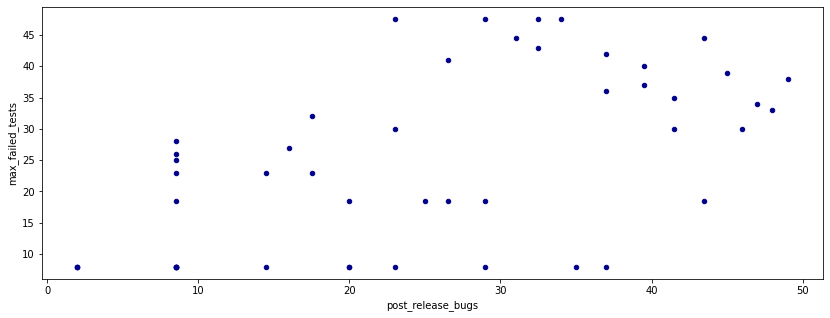

In [207]:
x = pd.DataFrame({"post_release_bugs": tags_comparison_with_metrics.post_release_bugs.rank(),
                  "max_failed_tests": tags_comparison_with_metrics.max_failed_tests.rank()})
x.plot.scatter(x="post_release_bugs", y="max_failed_tests", c='DarkBlue')

<AxesSubplot:xlabel='post_release_bugs', ylabel='canceled_gp3_bs3_n_bursts_max'>

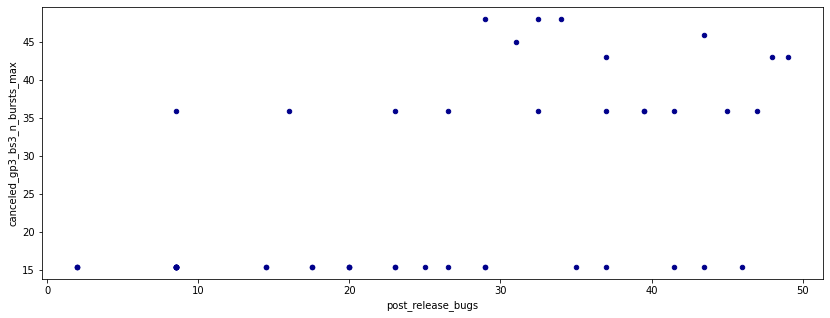

In [210]:
x = pd.DataFrame({"post_release_bugs": tags_comparison_with_metrics.post_release_bugs.rank(),
                  "canceled_gp3_bs3_n_bursts_max": tags_comparison_with_metrics.canceled_gp3_bs3_n_bursts_max.rank()})
x.plot.scatter(x="post_release_bugs", y="canceled_gp3_bs3_n_bursts_max", c='DarkBlue')

### Spearman correlation with Fix Time

In [ ]:
data = []
for col in tags_comparison_with_metrics_x.columns.values:
    corr, p_val = stats.spearmanr(tags_comparison_with_metrics_x[f"{col}"],tags_comparison_with_metrics_y.fix_time)
    data.append((col, corr, p_val))
spearman_corr_fix_time_df = pd.DataFrame(data, columns=["metric", "corr", "p_val"])

In [ ]:
spearman_corr_fix_time_df[spearman_corr_fix_time_df.p_val< 0.05].sort_values(by="corr", ascending=False)

### Spearman correlation with DDE

In [ ]:
data = []
for col in tags_comparison_with_metrics_x.columns.values:
    corr, p_val = stats.spearmanr(tags_comparison_x[f"{col}"],tags_comparison_with_metrics_y.dde)
    data.append((col, corr, p_val))
spearman_corr_dde_df = pd.DataFrame(data, columns=["metric", "corr", "p_val"])

In [ ]:
spearman_corr_dde_df[spearman_corr_dde_df.p_val< 0.05].sort_values(by="corr", ascending=False)

## Features types

## ML

In [217]:
X_train = tags_comparison_with_metrics_x

In [218]:
from sklearn import preprocessing

In [220]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [221]:
scaler.transform(X_train)

array([[-3.62850881, -0.90083371,  5.75420084, ...,  0.        ,
        -0.62284655, -0.50167092],
       [-0.40151633, -0.55895307,  0.84634212, ...,  0.        ,
         0.11256263,  2.01238447],
       [-0.51611015,  0.16448049,  0.37963883, ...,  0.        ,
         0.48026722,  0.05700806],
       ...,
       [ 1.59945034, -0.90083371, -0.94170058, ...,  0.        ,
        -0.62284655, -0.50167092],
       [ 1.59945034, -0.90083371, -0.94170058, ...,  0.        ,
         0.48026722,  0.05700806],
       [ 1.59945034, -0.90083371, -0.94170058, ...,  0.        ,
        -0.62284655, -0.50167092]])